In [2]:
### Imports
import numpy as np
import matplotlib.pyplot as plt
import csv
import math

Defining all Varaibles (Requires User)

In [3]:
### Set Maximum Energy
Q = 8000   #keV

In [4]:
### Detector Material Variables
mat = 'sn'
Z = 50
ratio = 3.5
T_c = 3.722 # Kelvin
M = 118.698820 * 931368088 # eV

In [5]:
### Define Constants
G_F = 1.663788*10**(-5) *10**(-18)   # GeV-2 to eV-2
sin_w = 0.231
hbar = 6.582119569 * 10**(-22) * 10**(6)   #MeV*s to eV*s
c = 299792458 * 10**2   #m/s to cm/s
k_B = 8.61733 * 10**(-5)  #eV/K

In [6]:
### Calculate the Superconducting Gap Energy
T_0 = ratio * k_B * T_c
print('Gap Energy: ' + str(T_0) + ' eV')

Gap Energy: 0.0011225795791 eV


In [7]:
### Calculate Minimum Neutrino Energy
# This is not the same for each isotope!  However, for ease I 
# conservatively defined this based on the heaviest mass.
E_min = 0.5*T_0+0.5*math.sqrt(T_0**2 + 2*T_0*M)
print('Minimum Detectable Energy: ' + str(E_min) + ' eV')

Minimum Detectable Energy: 7877.3017037994505 eV


In [8]:
### Make Energy Range List
energies = []   # in eV
for i in range(int(E_min*10**(-3))+1, int(Q)+1) :
    energies.append(i*10**(3))

Defining the Cross Section Function

In [9]:
def XS(N, M, E):
    
    # Define Weak Nuclear Charge
    Q_W = N-(1-4*sin_w)*Z
    
    # Define Maximum Recoil Energy
    T_max = E/(1+M/(2*E))
    
    # Calculate Cross Section
    const_term = G_F**2 / (4*math.pi) * (hbar*c)**2 
    sigma = const_term * E**2 * Q_W**2 * (1-T_0/T_max)**2
    return sigma

Define Each Detecting Isotope (Requires User)

In [11]:
# Isotope 112
prob_112 = 0.0097
N_112 = 62
M_112 = 111.904821 * 931368088 #amu to eV
xs_112 = []

# Isotope 114
prob_114 = 0.0065
N_114 = 64
M_114 = 113.902782 * 931368088 #amu to eV 
xs_114 = []

# Isotope 115
prob_115 = 0.0034
N_115 = 65
M_115 = 114.903346 * 931368088 #amu to eV 
xs_115 = []

# Isotope 116
prob_116 = 0.1454
N_116 = 66
M_116 = 115.901744 * 931368088 #amu to eV 
xs_116 = []

# Isotope 117
prob_117 = 0.0768
N_117 = 67
M_117 = 116.902954 * 931368088 #amu to eV 
xs_117 = []

# Isotope 118
prob_118 = 0.2422
N_118 = 68
M_118 = 117.901606 * 931368088 #amu to eV 
xs_118 = []

# Isotope 119
prob_119 = 0.0858
N_119 = 69
M_119 = 118.903309 * 931368088 #amu to eV 
xs_119 = []

# Isotope 120
prob_120 = 0.3259
N_120 = 70
M_120 = 119.902197 * 931368088 #amu to eV 
xs_120 = []

# Isotope 122
prob_122 = 0.0463
N_122 = 72
M_122 = 121.903440 * 931368088 #amu to eV 
xs_122 = []

# Isotope 124
prob_124 = 0.0579
N_124 = 74
M_124 = 123.905275 * 931368088 #amu to eV 
xs_124 = []

Calculate the Cross Section

In [12]:
### Calculate Individual Isotope Cross Sections
for e in energies :
    xs_112.append(XS(N_112, M_112, e))
    xs_114.append(XS(N_112, M_112, e))
    xs_115.append(XS(N_112, M_112, e))
    xs_116.append(XS(N_112, M_112, e))
    xs_117.append(XS(N_112, M_112, e))
    xs_118.append(XS(N_112, M_112, e))
    xs_119.append(XS(N_112, M_112, e))
    xs_120.append(XS(N_112, M_112, e))
    xs_122.append(XS(N_112, M_112, e))
    xs_124.append(XS(N_112, M_112, e))

In [13]:
### Calculate Total Cross Section
xs_tot = []

for i in range(0,len(xs_112)) :
    tot = xs_112[i]*prob_112 + \
            xs_114[i]*prob_114 + \
            xs_115[i]*prob_115 + \
            xs_116[i]*prob_116 + \
            xs_117[i]*prob_117 + \
            xs_118[i]*prob_118 + \
            xs_119[i]*prob_119 + \
            xs_120[i]*prob_120 + \
            xs_122[i]*prob_122 + \
            xs_124[i]*prob_124
    xs_tot.append(tot)

In [14]:
### Convert energies back to keV
kev = []
for e in energies :
    kev.append(e*10**(-3))

Generate Results Files

<function matplotlib.pyplot.show(close=None, block=None)>

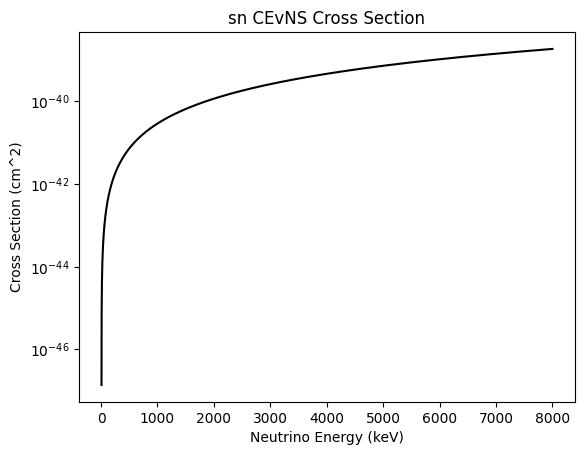

In [15]:
### Plot Cross Section
plt.plot(kev, xs_tot, color='black')
plt.title(mat + ' CEvNS Cross Section')
plt.xlabel('Neutrino Energy (keV)')
plt.ylabel('Cross Section (cm^2)')
plt.yscale('log')
plt.savefig(mat + '_xs.pdf')
plt.show

In [16]:
### Download Data as a CSV File
csv_file = mat + '_xs.csv'
with open(csv_file, 'w', newline='') as file:
    fieldnames = ['energy', 'xs']
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    writer.writeheader()
    for i in range(len(energies)) :
        writer.writerow({'energy': energies[i], 'xs': xs_tot[i]})